# Fitbod Data Challange

### Importing the required packages

In [335]:
import pandas as pd
import numpy as np
import pandasql as ps
from pandas_profiling import ProfileReport
from matplotlib import pyplot as plt 
%matplotlib inline
import os
import seaborn as sns

Loading the data 

In [336]:
path = os.getcwd() + '/fitbod_Sravani_Sigadam_20211115-163913.csv'
fitness_data = pd.read_csv(filepath_or_buffer = path,index_col= False)

## Exploratory Analysis

In [431]:
# To display the top 5 rows

fitness_data.head()

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
0,2021-07-12,W2NPPL0cw1,olwH9a4pKv,zPuQYDlxfB,Knee Raise,10,4.082336,fake_id_397
1,2021-07-01,RM8Jldvg36,dFycDkJyHe,Jf9JQJu5qI,Dumbbell Shoulder Raise,14,5.443115,fake_id_399
2,2021-03-24,TAeoS6xkDG,xPS7RzoOGm,zgz85BzGTP,Bent Over Barbell Row,8,27.669167,fake_id_394
3,2021-04-13,4YGjgnynpi,djuvlRHUvb,ZrkSmtwIdC,Dumbbell Rear Delt Raise,10,11.339823,fake_id_396
4,2021-06-29,4ANPWXAg8j,BN1DjSE1Zi,cYms1MVCiw,Romanian Deadlift,15,47.627255,fake_id_434


In [432]:
# To find the shape of the data

fitness_data.shape

(26824, 8)

<span style="font-size:16px"> The data has 26,824 rows and 8 colums(features) for analysis </span>

In [339]:
#Checking the types of data

fitness_data.dtypes

Date             object
workoutId        object
exerciseId       object
singleSetId      object
exerciseName     object
reps              int64
weight          float64
fake_user_id     object
dtype: object

<span style="font-size:16px">  There are 2 numerical variables (reps and weight) and 4 Categorical variables (workoutId, exerciseId, singleSetId,exerciseName) </span>

In [433]:
# Checking for missing values in the data 

fitness_data.isna().sum()

Date            0
workoutId       0
exerciseId      0
singleSetId     0
exerciseName    0
reps            0
weight          0
fake_user_id    0
dtype: int64

<span style="font-size:16px"> There are no missing values in the data </span>

## Distribution plots

<span style="font-size:16px"> Violin plot is an alternative to box plot which is also visually pleasing. </span>




<span style="font-size:16px"> The shape or area of the violin depends on the number of observations. </span>

In [434]:
# function to find the distributions 

def plot_distribution(col:str):
    sns.set_theme(style="whitegrid")
    ax = sns.violinplot(x=fitness_data[col], scale = "count", inner = "quartile")
    return ax

<AxesSubplot:xlabel='reps'>

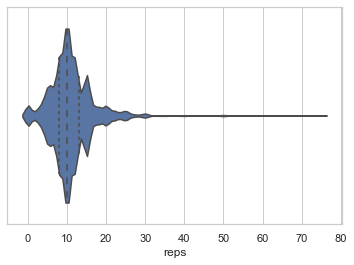

In [435]:
plot_distribution('reps')

<span style="font-size:16px"> Reps is the number of repetitions a users does for a particular exercise </span>

    
<span style="font-size:16px"> From the above distribution plot for numerical variable 'reps' the mininum value is zero and the maximum value is 75 </span>
    
    
<span style="font-size:16px">There are more number of 10s which indicates most users do 10 reps as a part of their exercises </span>

<AxesSubplot:xlabel='weight'>

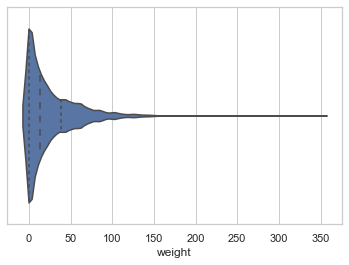

In [343]:
plot_distribution('weight')

<span style="font-size:16px"> Weight is the weight that a user lifts for a particular exercise </span>


<span style="font-size:16px"> From the above distribution plot for numerical variable 'weight' the mininum value is zero and the maximum value is 349.7 </span>
    
    
<span style="font-size:16px"> There are more number of 0s in the weight column. Some of the possible reasons might be
    
    
    
    1. Users not updating the weight in the app
    2. Data pipeline errors which is not injesting data </span>

<span style="font-size:16px"> Generally, if there are more 0s, they those data rows can be deleted or replaced with an appropriate value(mean of the column) and retain the data based on number of rows.  </span>


<span style="font-size:16px">After some more analysis and deep dive into the data, I will decide if I need to replace the zeros or let them be. </span>

In [344]:
# Other statistics of the numberical variables

fitness_data.describe()

,reps,weight
count,26824.000000,26824.000000
mean,10.933791,24.519004
std,5.532025,29.694824
min,0.000000,0.000000
25%,8.000000,0.000000
50%,10.000000,13.607787
75%,13.000000,38.555397
max,75.000000,349.720133


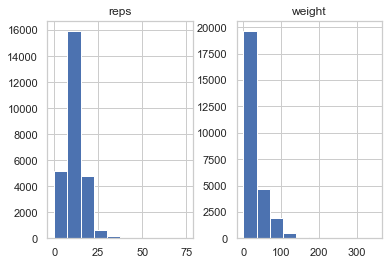

In [345]:
# Histograms of the numerical variables reps and weight

hist = continuous_features.hist(bins=10)

<span style="font-size:16px"> From the data, 
    
- There are 58 unique customers 
- 107 unique exercises with 107 exercise id's </span>

In [346]:
# Unique values in the data

unique_values = fitness_data.nunique(axis=0)
unique_values

Date              318
workoutId        4214
exerciseId        107
singleSetId     26824
exerciseName      107
reps               46
weight            188
fake_user_id       58
dtype: int64

### Types of users

#### Top 10 users

<span style="font-size:16px"> fake_id_402 This user has logged the most number of exercises. </span>

<span style="font-size:16px"> Analysis of this user will help understand the data better </span>

fake_id_402    1605
fake_id_406    1483
fake_id_401    1084
fake_id_395     996
fake_id_392     977
fake_id_396     976
fake_id_412     921
fake_id_398     905
fake_id_408     881
fake_id_403     881
Name: fake_user_id, dtype: int64


<AxesSubplot:>

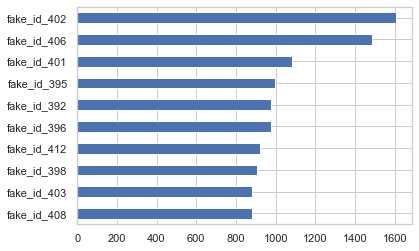

In [347]:
# To find the 10 users who did most exercise

users = fitness_data['fake_user_id'].value_counts()

top_users = fitness_data['fake_user_id'].value_counts()[:10]
print(top_users)

top_users.sort_values().plot(kind = 'barh')

fake_id_447    94
fake_id_445    87
fake_id_404    76
fake_id_442    74
fake_id_446    64
fake_id_444    49
fake_id_421    35
fake_id_443    25
fake_id_449    10
fake_id_437     3
Name: fake_user_id, dtype: int64


<AxesSubplot:>

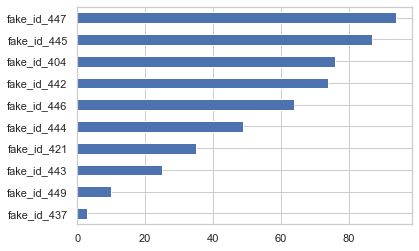

In [348]:
# To find the 10 users who did least exercise

last10_users = fitness_data['fake_user_id'].value_counts()[-10:]
print(last10_users)

last10_users.sort_values().plot(kind = 'barh')

#### Analysing the top user 'fake_id_402'

In [349]:
# Analysis of the top user

top_user = fitness_data.loc[fitness_data['fake_user_id'] == 'fake_id_402']
top_user

,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
43,2021-01-04,RnNjXHFOiZ,dFycDkJyHe,TXEf3MvaJn,Dumbbell Shoulder Raise,7,5.669911,fake_id_402
75,2021-08-24,OHyf9uiW2Q,omtypRFVyt,5sk2KPL7xg,Power Clean,5,34.019468,fake_id_402
88,2021-01-28,Lc8D5s1pXY,djuvlRHUvb,YaTEaVcNTo,Dumbbell Rear Delt Raise,12,4.535929,fake_id_402
130,2021-02-22,1GOCj1lgO3,G1mxtZtEs5,amqs5c8mSK,Back Squat,10,43.091326,fake_id_402
145,2021-07-17,WEw7dI1qnL,243X43p1XP,7WrLKibgiX,Seated Leg Curl,8,40.823362,fake_id_402
...,...,...,...,...,...,...,...,...
26658,2021-07-18,nLPMGGtRem,dFycDkJyHe,5PoLyLYEmM,Dumbbell Shoulder Raise,10,5.669911,fake_id_402
26674,2021-04-08,bDYA19D2rr,G1mxtZtEs5,CIlcMVKJQY,Back Squat,5,43.091326,fake_id_402
26689,2021-04-21,SpJSy6RWaA,G1mxtZtEs5,eBrNR5NJHZ,Back Squat,3,47.627255,fake_id_402
26715,2021-04-21,SpJSy6RWaA,G1mxtZtEs5,EEDMpijz7o,Back Squat,3,47.627255,fake_id_402


In [350]:
# Top user exercises with weight 0

fitness_data.loc[(fitness_data['fake_user_id'] == 'fake_id_402') & (fitness_data['weight'] == 0)].sort_values(by = 'weight')


,Date,workoutId,exerciseId,singleSetId,exerciseName,reps,weight,fake_user_id
155,2021-02-17,OlsKsylvA2,DdtF1OFcuQ,FZixs7X8RK,Tricep Push Up,11,0.0,fake_id_402
17865,2021-02-23,ZqQfJS5qMi,DdtF1OFcuQ,ecHURGnkhy,Tricep Push Up,12,0.0,fake_id_402
17800,2021-03-15,1EQ7Ikxejh,DdtF1OFcuQ,m048xfr6OO,Tricep Push Up,10,0.0,fake_id_402
17780,2021-01-15,Ntzc8W2FY7,N6zu9IJNBz,3vFBrPcwDu,Leg Raise,7,0.0,fake_id_402
17698,2021-03-26,f7GC39SDGu,crpeAKEXTd,07HaRC9hlf,TRX Atomic Push Up,5,0.0,fake_id_402
...,...,...,...,...,...,...,...,...
8979,2021-07-02,JAECPPgt8k,AF7Qq7XK2r,WfGcM2I8gb,Air Squats,11,0.0,fake_id_402
8963,2021-03-18,NMNjaZtu8s,N6zu9IJNBz,x19qSGvjA5,Leg Raise,10,0.0,fake_id_402
8946,2021-03-05,omAfoELa6N,N6zu9IJNBz,iizyTEfxLq,Leg Raise,10,0.0,fake_id_402
9437,2021-04-26,tufsrW62PH,qfkBJ4A5eQ,Hspwp0G0Mp,Dead Bug,7,0.0,fake_id_402


Leg Raise             102
Tricep Push Up         92
Hanging Leg Raise      85
Back Squat             66
Barbell Hip Thrust     64
Name: exerciseName, dtype: int64


<AxesSubplot:>

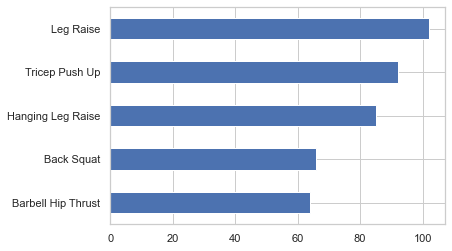

In [351]:
# Most done exercises of the top user

top_user_exercise = top_user['exerciseName'].value_counts()[:5]
print(top_user_exercise)

top_user_exercise.sort_values().plot(kind = 'barh')

In [352]:
top_user.nunique(axis=0)

Date             195
workoutId        211
exerciseId        73
singleSetId     1605
exerciseName      73
reps              19
weight            48
fake_user_id       1
dtype: int64

In [353]:
# Average number of times the user does exercise over the time
top_user['Date'].value_counts().mean()

8.23076923076923

In [354]:
# Statistics of the top user
top_user.describe()

,reps,weight
count,1605.000000,1605.000000
mean,8.584424,20.059602
std,3.192671,22.879966
min,0.000000,0.000000
25%,6.000000,0.000000
50%,8.000000,13.607787
75%,10.000000,29.483539
max,22.000000,92.986546


<span style="font-size:16px"> Summary from the above analysis of the top user(fake_id_402), </span>

- The top user has done exercise 1605 times over the time.
- User has done 73 exercises out of 107 different exercises.
- For the user, the top exercises like Leg Raise, Tricep Push Up etc, have 0 weight which makes sense because some exercises may not need weights or the user prefers not to use weight.
- So, for model building the weight 0 is not replaced or removed.
- This type of analysis can be done for different users by grouping them based on their type of exercises.

### Top exercises

<span style="font-size:16px"> 1. Back Squat is the most popular exercise is done 1544 times with 39 unique users and average of 6.8 reps and 80.15 weight </span>


<span style="font-size:16px"> 2. Freemotion Chest Press is least done exercise with 1 user </span>


Back Squat                  1544
Dumbbell Rear Delt Raise     872
Barbell Shoulder Press       848
Dumbbell Kickbacks           821
Air Squats                   813
Calf Raise                   804
Seated Leg Curl              787
Tricep Push Up               778
Romanian Deadlift            741
Dumbbell Shoulder Raise      693
Name: exerciseName, dtype: int64


<AxesSubplot:>

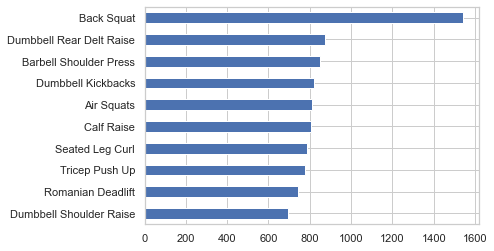

In [355]:
# To find the 10 exercises done by the users

exercises = fitness_data['exerciseName'].value_counts()

top10_exercises = fitness_data['exerciseName'].value_counts()[:10]
print(top10_exercises)

top10_exercises.sort_values().plot(kind = 'barh')

Machine Shoulder Shrug        18
TRX Fallout                   18
Torture Twist                 17
TRX Side Plank                14
Handle Band Squat to Press    13
Abs Bike                      12
Kettlebell Pistol Squat       11
Decline Leg Raise              8
Sled Pull                      8
Freemotion Chest Press         2
Name: exerciseName, dtype: int64


<AxesSubplot:>

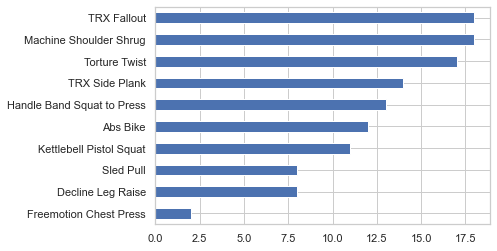

In [356]:
# To see the least done exercises 

last10_exercises = exercises.iloc[-10:]
print(last10_exercises)

last10_exercises.sort_values().plot(kind = 'barh')

In [357]:
# Unique users who prefer back squats

unique_backSquat = fitness_data.loc[fitness_data['exerciseName'] == 'Back Squat']
unique_backSquat.nunique(axis=0)

Date             213
workoutId        381
exerciseId         1
singleSetId     1544
exerciseName       1
reps              16
weight            78
fake_user_id      39
dtype: int64

In [358]:
unique_freemotion = fitness_data.loc[fitness_data['exerciseName'] == 'Freemotion Chest Press']
unique_freemotion.nunique(axis=0)

Date            1
workoutId       1
exerciseId      1
singleSetId     2
exerciseName    1
reps            1
weight          1
fake_user_id    1
dtype: int64

## Model Building

<span style="font-size:16px"> We can run a simple linear regression model to predict the number of reps the user can do for a given weight based on the type of exercise.
I am using simple linear regression for the explainability of the model and also the availability of data</span>

### Data Preparation 

<span style="font-size:16px"> Firstly, to prepare the data for modelling I am dropping the non-relevant variables. 
    
exerciseId is being dropped because it is analogous to exerciseName and other variables do not provide much information </span>

In [377]:
# Dropping irrelevant columns
df = fitness_data.drop(['Date', 'workoutId', 'exerciseId', 'singleSetId', 'fake_user_id'], axis=1)
df.head()

,exerciseName,reps,weight
0,Knee Raise,10,4.082336
1,Dumbbell Shoulder Raise,14,5.443115
2,Bent Over Barbell Row,8,27.669167
3,Dumbbell Rear Delt Raise,10,11.339823
4,Romanian Deadlift,15,47.627255



<span style="font-size:16px"> There are no null values to drop </span>

<span style="font-size:16px">  Weight 0 is valid for most of the exercises so retaining it </span>

In [425]:
# Function to fit the regression model

def fit_linear_regression(dataset, exercisename):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression 
    from sklearn.metrics import mean_squared_error, r2_score
    X = dataset.loc[dataset['exerciseName'] == exercisename]['weight']
    y = dataset.loc[dataset['exerciseName'] == exercisename]['reps']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 135153)
    #print(X_train.values.reshape(-1,1))
    model = LinearRegression().fit(X_train.values.reshape(-1,1), y_train)
    # Make predictions using the testing set
    pred = model.predict(X_test.values.reshape(-1,1))
    # The coefficients
    print("Coefficients: \n", model.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, pred))
    return model.score(X_test.values.reshape(-1,1), y_test)

### Results 

<span style="font-size:16px"> The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. Here, the MSE is 7.40. Lower the MSE, the closer is forecast to actual value and indicates a better fit. </span>
    
<span style="font-size:16px">  R squared or Coefficient of determination is the proportion of the variation in the dependent variable that is predictable from the independent variables. </span>

<span style="font-size:16px">  A value of 1.0 indicates a perfect fit, which is a highly reliable model, while a value of 0.01 would indicate that the calculation fails to accurately model the data. </span>

In [429]:
lr = fit_linear_regression(df, 'Knee Raise')

Coefficients: 
 [-0.74653799]
Mean squared error: 7.40
Coefficient of determination: 0.01


## Conclusion and Points to Consider:


<span style="font-size:14px">  Some explanations about singleSetId would have helped.
For example, if we look at the data for fake_id_402 on 1/5/21, the user has done 4 different types of exercises and each exercise has been logged 3 times with a different singleSetId for same reps and weight </span>

<span style="font-size:14px">  Need more data in terms of some features related to users to explore more about what types of exercises are being suggested and build a better model </span>

<span style="font-size:14px">  Based on the model, a scoring data set would help to evaluate the model on unseen data </span>

